In [4]:
#upload dataset zip file
from google.colab import files
uploaded = files.upload()

Saving trash sorting.v2i.tensorflow.zip to trash sorting.v2i.tensorflow.zip


In [5]:
#extract data
import zipfile
import os

zip_path = "trash sorting.v2i.tensorflow.zip"
extract_path = "/content/trash_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: /content/trash_data


First few rows:
                                            filename  width  height    class  \
0  63175eb17be1e63175eb17be24_frame57_jpg.rf.be5b...    640     640  Plastic   
1  63971668873496397166887351_frame1_jpg.rf.bfc3e...    640     640    Metal   
2  63971668873496397166887351_frame1_jpg.rf.bfc3e...    640     640      Bin   
3  62c692e42087e62c692e420884_frame45_jpg.rf.bf6c...    640     640      Bin   
4  62c692e42087e62c692e420884_frame45_jpg.rf.bf6c...    640     640    Metal   

   xmin  ymin  xmax  ymax  
0   347   341   541   492  
1     1   245   331   550  
2     4    12   639   466  
3     1     0   571   441  
4   141   245   279   306  

Class distribution:
class
Glass      779
Metal      645
Bin        636
Plastic    362
Other       24
Name: count, dtype: int64


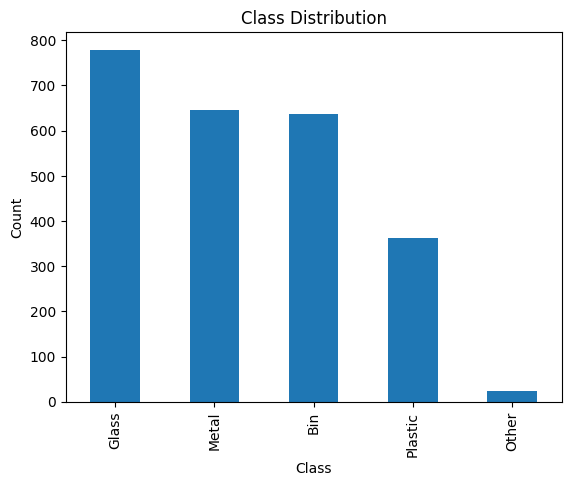

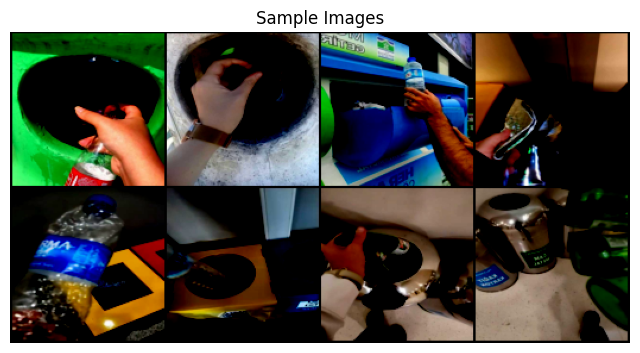

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from collections import Counter

#set data path
data_dir = "/content/trash_data/train"
annotations_file = os.path.join(data_dir, '_annotations.csv')

#load annotations
df = pd.read_csv(annotations_file)

#EDA

print("First few rows:")
print(df.head())
print("\nClass distribution:")
print(df['class'].value_counts())

#class distribution
df['class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#custom Dataset
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        return image, label

#image transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

#dataset and dataloader
dataset = CustomImageDataset(annotations_file=annotations_file, img_dir=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#display simple images
import torchvision
images, labels = next(iter(dataloader))
img_grid = torchvision.utils.make_grid(images[:8], nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(img_grid.permute(1, 2, 0))  #CHW to HWC
plt.title("Sample Images")
plt.axis('off')
plt.show()

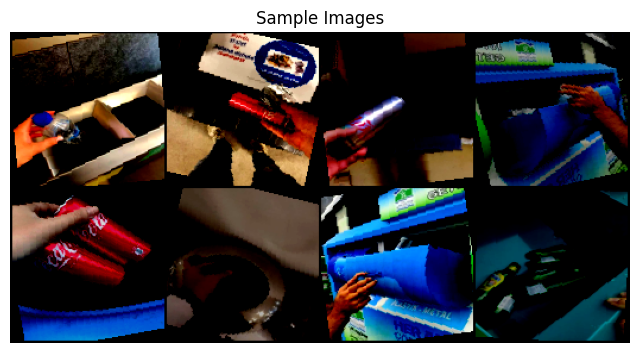

In [16]:
#visualize advanced transformations

augmented_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

dataset = CustomImageDataset(annotations_file=annotations_file, img_dir=data_dir, transform=augmented_transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

images, labels = next(iter(dataloader))
img_grid = torchvision.utils.make_grid(images[:8], nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(img_grid.permute(1, 2, 0))
plt.title("Sample Images")
plt.axis('off')
plt.show()

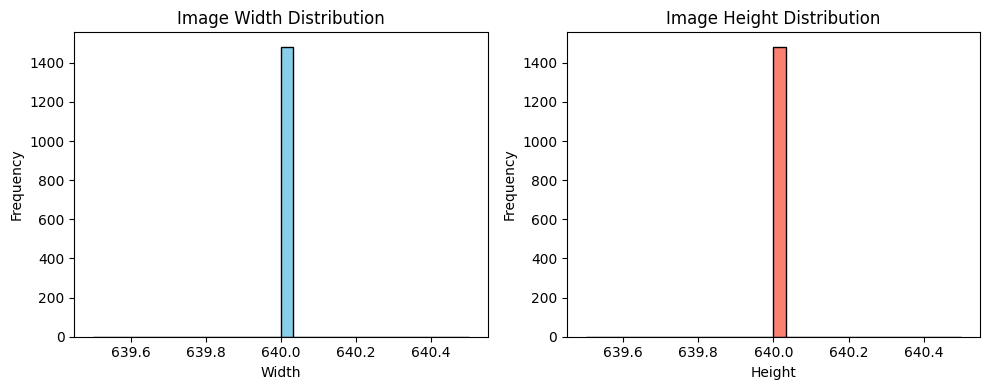

In [17]:
#check original images size distribution in train/test/val sets

def get_image_sizes(image_folder):
    widths, heights = [], []
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('jpg', 'jpeg', 'png')):
            try:
                with Image.open(os.path.join(image_folder, filename)) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
            except:
                continue
    return widths, heights

image_folder = "/content/trash_data/train"  #for training set
widths, heights = get_image_sizes(image_folder)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

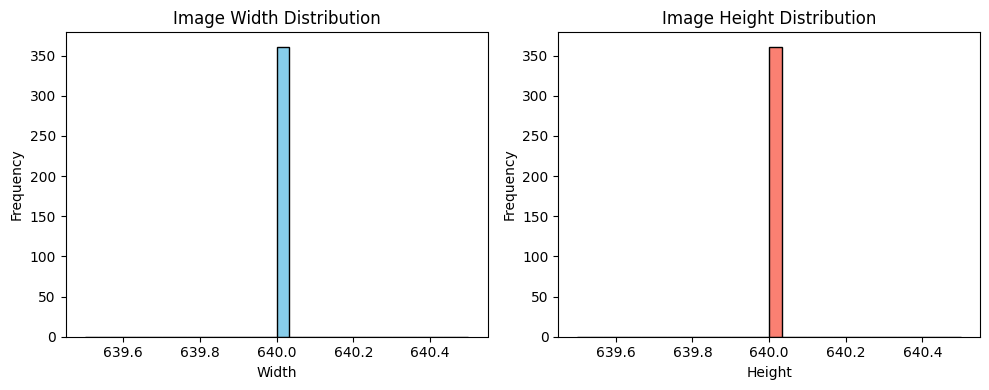

In [19]:
image_folder = "/content/trash_data/test"  #for test set
widths, heights = get_image_sizes(image_folder)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

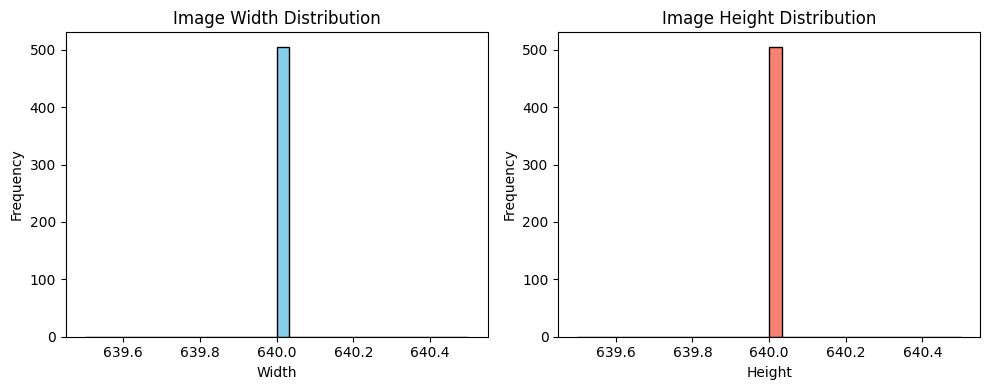

In [20]:
image_folder = "/content/trash_data/valid"  #for validation set
widths, heights = get_image_sizes(image_folder)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()